In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</stule>"))

In [2]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date
# import datetime

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [3]:
# Define paths
# rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 
# rootdir_data = "D:\Pandemix\Github\DanskeData\\"
# rootdir_data = "C:\\Users\\rakrpe\\OneDrive - Roskilde Universitet\\Documents\\PandemiX\\GithubRepos\\PandemiX\\DanskeData\\"
rootdir_data = "C:/Users/rakrpe/GithubRepos/PandemiX/DanskeData/"

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"
path_figs = os.getcwd() +"/../Figures/" 

In [4]:
# Get all cause from MOMO
# df_momo = pd.read_csv('MOMOdata_ny.csv',delimiter=';')
# df_momo = pd.read_csv('DKMOMO-2022-5.csv',delimiter=';')
# df_momo = pd.read_csv('DKMOMO-2022-6.csv',delimiter=';')
# df_momo = pd.read_csv('DKMOMO-2022-7.csv',delimiter=';')
# df_momo = pd.read_csv('DKMOMO-2022-8.csv',delimiter=';')
df_momo = pd.read_csv('DKMOMO-2022-9.csv',delimiter=';')
df_momo['nbc'] = pd.to_numeric(df_momo['nbc'].str.replace(',','.'))
df_momo['Pnb'] = pd.to_numeric(df_momo['Pnb'].str.replace(',','.'))
df_momo['YearWeek'] = df_momo.YoDi.astype(str) + df_momo.WoDi.apply(lambda x: '{0:0>2}'.format(x))
df_momo['Date'] = pd.to_datetime(df_momo.YearWeek.astype(str)+'1',format='%G%V%u')
print(df_momo.columns)
allAges = df_momo.group.unique()
print(allAges)
df_momo.tail()

Index(['YoDi', 'WoDi', 'group', 'nb', 'nbc', 'Pnb', 'country', 'YearWeek',
       'Date'],
      dtype='object')
['00to19' '20to39' '40to49' '50to54' '55to59' '60to64' '65to69' '70to74'
 '75to79' '80to84' '85to89' '90to94' '95P' 'Total']


,YoDi,WoDi,group,nb,nbc,Pnb,country,YearWeek,Date
1591,2022,5,Total,1247,1281.809,1147.558,Denmark,202205,2022-01-31
1592,2022,6,Total,1309,1358.329,1148.153,Denmark,202206,2022-02-07
1593,2022,7,Total,1291,1344.299,1148.103,Denmark,202207,2022-02-14
1594,2022,8,Total,1278,1340.986,1147.413,Denmark,202208,2022-02-21
1595,2022,9,Total,1117,1216.838,1146.095,Denmark,202209,2022-02-28


In [5]:
df_dkstat = pd.read_csv('DK_Stat_Deaths.csv',encoding='latin1',delimiter=';')
curYearWeek = df_dkstat.iloc[:-3:3,0]
df_dkstat = df_dkstat.iloc[2:-1:3,3:]

df_temp = pd.DataFrame()
df_temp['Week'] = curYearWeek.values
curYears = df_temp['Week'].apply(lambda x: x[:4]).astype(int)
curWeeks = df_temp['Week'].apply(lambda x: x[5:]).astype(int)
dkstatDates = pd.to_datetime((curYears*100+curWeeks).astype(str)+'1',format='%G%V%u')
df_dkstat = df_dkstat.transpose()
df_dkstat.columns =list(dkstatDates)
df_dkstat = df_dkstat.iloc[1:]
# Function for getting all cause mortality in a specific range
def getAllCause(minAge=0,maxAge=125):

    firstAges = np.array([int(x.split('-')[0]) for x in df_dkstat.index[:-1]])
    lastAges = np.array([int(x.split('-')[1].split(' ')[0]) for x in df_dkstat.index[:-1]])

    firstIndex = np.where(firstAges == minAge)[0][0]
    if (lastAges == maxAge).any():
        lastIndex = np.where(lastAges == maxAge)[0][0]
    else:
        lastIndex = len(df_dkstat)

    curSum = df_dkstat.iloc[firstIndex:lastIndex].sum()
    curDates = curSum.index
    curCount = curSum.values

    return curCount,curDates

getAllCause(0,5)
# getAllCause(4,20)
df_dkstat.iloc[0]
dkstatTot = df_dkstat.sum()
dkstatDates = pd.to_datetime(df_dkstat.columns)

In [6]:
df_total = df_momo[df_momo.group=='Total']

(18262.0, 18993.0)

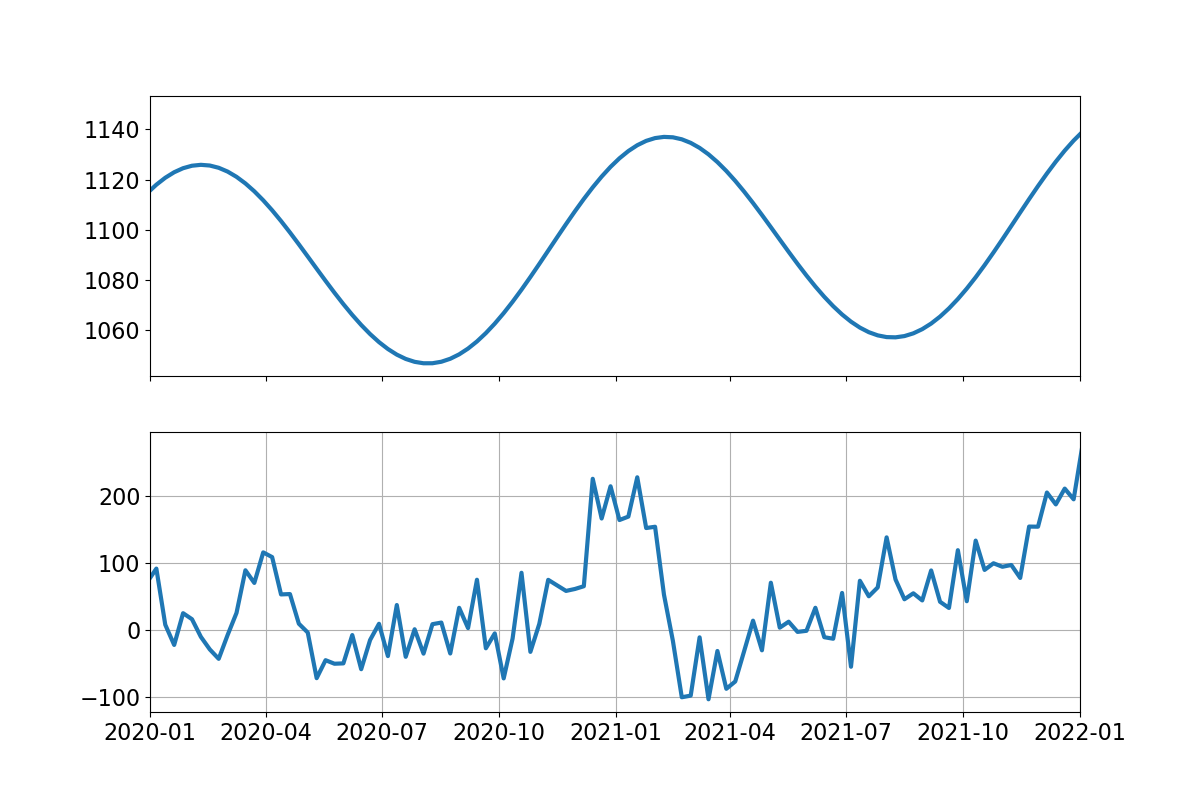

In [7]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

#ax1.plot(df_total.Date,df_total.nb)
#ax1.plot(dkstatDates,dkstatTot,':')
#ax1.plot(df_total.Date,df_total.nbc)
ax1.plot(df_total.Date,df_total.Pnb)
ax2.plot(df_total.Date,df_total.nbc-df_total.Pnb)
ax2.grid()
ax2.set_xlim(left=np.datetime64('2020-01'),right=np.datetime64('2022-01'))